In [62]:
import os, sys
import nltk
import pandas as pd

import matplotlib.pyplot as plt
#pip install yellowbrick

In [63]:
dir = '/Users/Fox/Desktop/Data Science/NLP/Project/Data/'

In [64]:
df = pd.read_csv(dir + 'train_lyrics_1000.csv')
df

file               artist                        title  \
0    TRAAAAW128F429D538.h5               Casual             I Didn't Mean To   
1    TRAAAEF128F4273421.h5             Adam Ant              Something Girls   
2    TRAAAFD128F92F423A.h5                  Gob               Face the Ashes   
3    TRAABJV128F1460C49.h5        Lionel Richie      Tonight Will Be Alright   
4    TRAABLR128F423B7E3.h5           Blue Rodeo                     Floating   
..                     ...                  ...                          ...   
995  TRBIGRY128F42597B3.h5                 Sade           All About Our Love   
996  TRBIIEU128F9307C88.h5      New Found Glory  Don't Let Her Pull You Down   
997  TRBIIJY12903CE4755.h5       Mindy McCready          Ten Thousand Angels   
998  TRBIIOT128F423C594.h5         Joy Division               Leaders Of Men   
999  TRBIJYB128F14AE326.h5  Seventh Day Slumber               Shattered Life   

                                                lyrics        genre   mood  \
0    Verse One:\n\nAlright I might\nHave had a litt...  Hip Hop/Rap    sad   
1    Adam Ant/Marco Pirroni\nEvery girl is a someth...         Rock  happy   
2    I've just erased it's been a while, I've got a...         Rock    sad   
3    Little darling \nWhere you've been so long \nI...          R&B  happy   
4    Lead Vocal by Greg\n\nWell, these late night c...         Rock    sad   
..                                                 ...          ...    ...   
995  Its all about our love\nSo shall it be forever...          R&B    sad   
996  It's time that I rain on your parade\nWatch as...         Rock  happy   
997  Speakin of the devil\nLook who just walked in\...      Country  happy   
998  Born from some mother's womb\nJust like any ot...         Rock    sad   
999  This wanting more from me is tearing me, it's ...         Rock    sad   

     year  
0    1994  
1    1982  
2    2007  
3    1986  
4    1987  
..    ...  
995  2000  
996  2009  
997  1996  
998  1978  
999  2005  

[1000 rows x 7 columns]

In [68]:
#lyrics Sample
print(df['lyrics'][1])

Adam Ant/Marco Pirroni
Every girl is a something girl
Every girl is a something girl
Every girl is a something girl
She's got something
Every girl is a something girl
Every girl has a somehing smile
Every girl is a something girl
For a while
If I had three wishes I know mine
I would not ask the stars to shine
I wouldn't ask for gems or pearls
I'd ask for the something girls
Every girl is a something girl
From the whites of her eyes
To the tip of a curl
Every girl sends a something boy
With that something
When this old world won't treat you right
You're not feeling yourself tonight
Think of someone you can do
Relax and let that something through
Every girl is a something girl
She's got she's got something


In [272]:
df['lyrics']

0      Verse One:\n\nAlright I might\nHave had a litt...
1      Adam Ant/Marco Pirroni\nEvery girl is a someth...
2      I've just erased it's been a while, I've got a...
3      Little darling \nWhere you've been so long \nI...
4      Lead Vocal by Greg\n\nWell, these late night c...
                             ...                        
995    Its all about our love\nSo shall it be forever...
996    It's time that I rain on your parade\nWatch as...
997    Speakin of the devil\nLook who just walked in\...
998    Born from some mother's womb\nJust like any ot...
999    This wanting more from me is tearing me, it's ...
Name: lyrics, Length: 1000, dtype: object

In [65]:
type(df['lyrics'])

pandas.core.series.Series

In [66]:
#all_words = ''
#for lyrics in df['lyrics']:
#    this_sentence = lyrics
#    all_words += this_sentence
#print(all_words)

In [67]:
#pip search

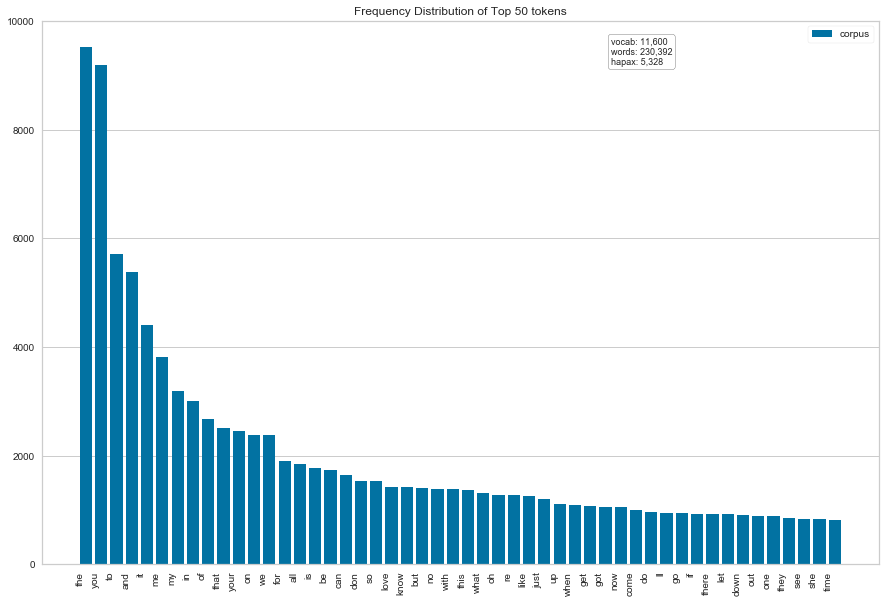

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
#from yellowbrick.datasets import load_hobbies
df = pd.read_csv(dir + 'train_lyrics_1000.csv')
# Load the text data
Lyrics = df['lyrics']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(Lyrics)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v',size=(1080, 720))
visualizer.fit(docs)
visualizer.show()

In [257]:
er = []
for i in range(len(df['lyrics'])):
    er.append(df['lyrics'][i])
er

["Verse One:\n\nAlright I might\nHave had a little glare when I stared at ya ho\nBut I didn't know she was like that\nShe stared right back\nMy niggas warnin me that she was comin on to me\nI react like a mack do I act cool\nJust to test her cause I ain't no jester\nI suggest her and her friend be outtie\nCause I don't want to make my pals get rowdy\nAnd doubt me our friendship\nBut when lips touch\nI go crazy in the clutch\nSorta like schitzo I forgets my bros and pals over gals\nI didn't mean to but when you fiend you do\nStrange things for the denim no matter who's in em\nGrab a flooze then I'm in traffic\nDon't laugh it might be your girl that I'm talkin about\nI didn't mean to\n\nChorus: Repeat 2X\n\nIt ain't my fault that your girl got caught\nIt ain't my fault that your girl got caught (I didn't mean to)\n\nVerse Two:\n\nAnother incident when I went\nWay beyond what I should of done\nJohn should of stopped before them drawers dropped\nBut I didn't ain't no quittin\nReally didn't

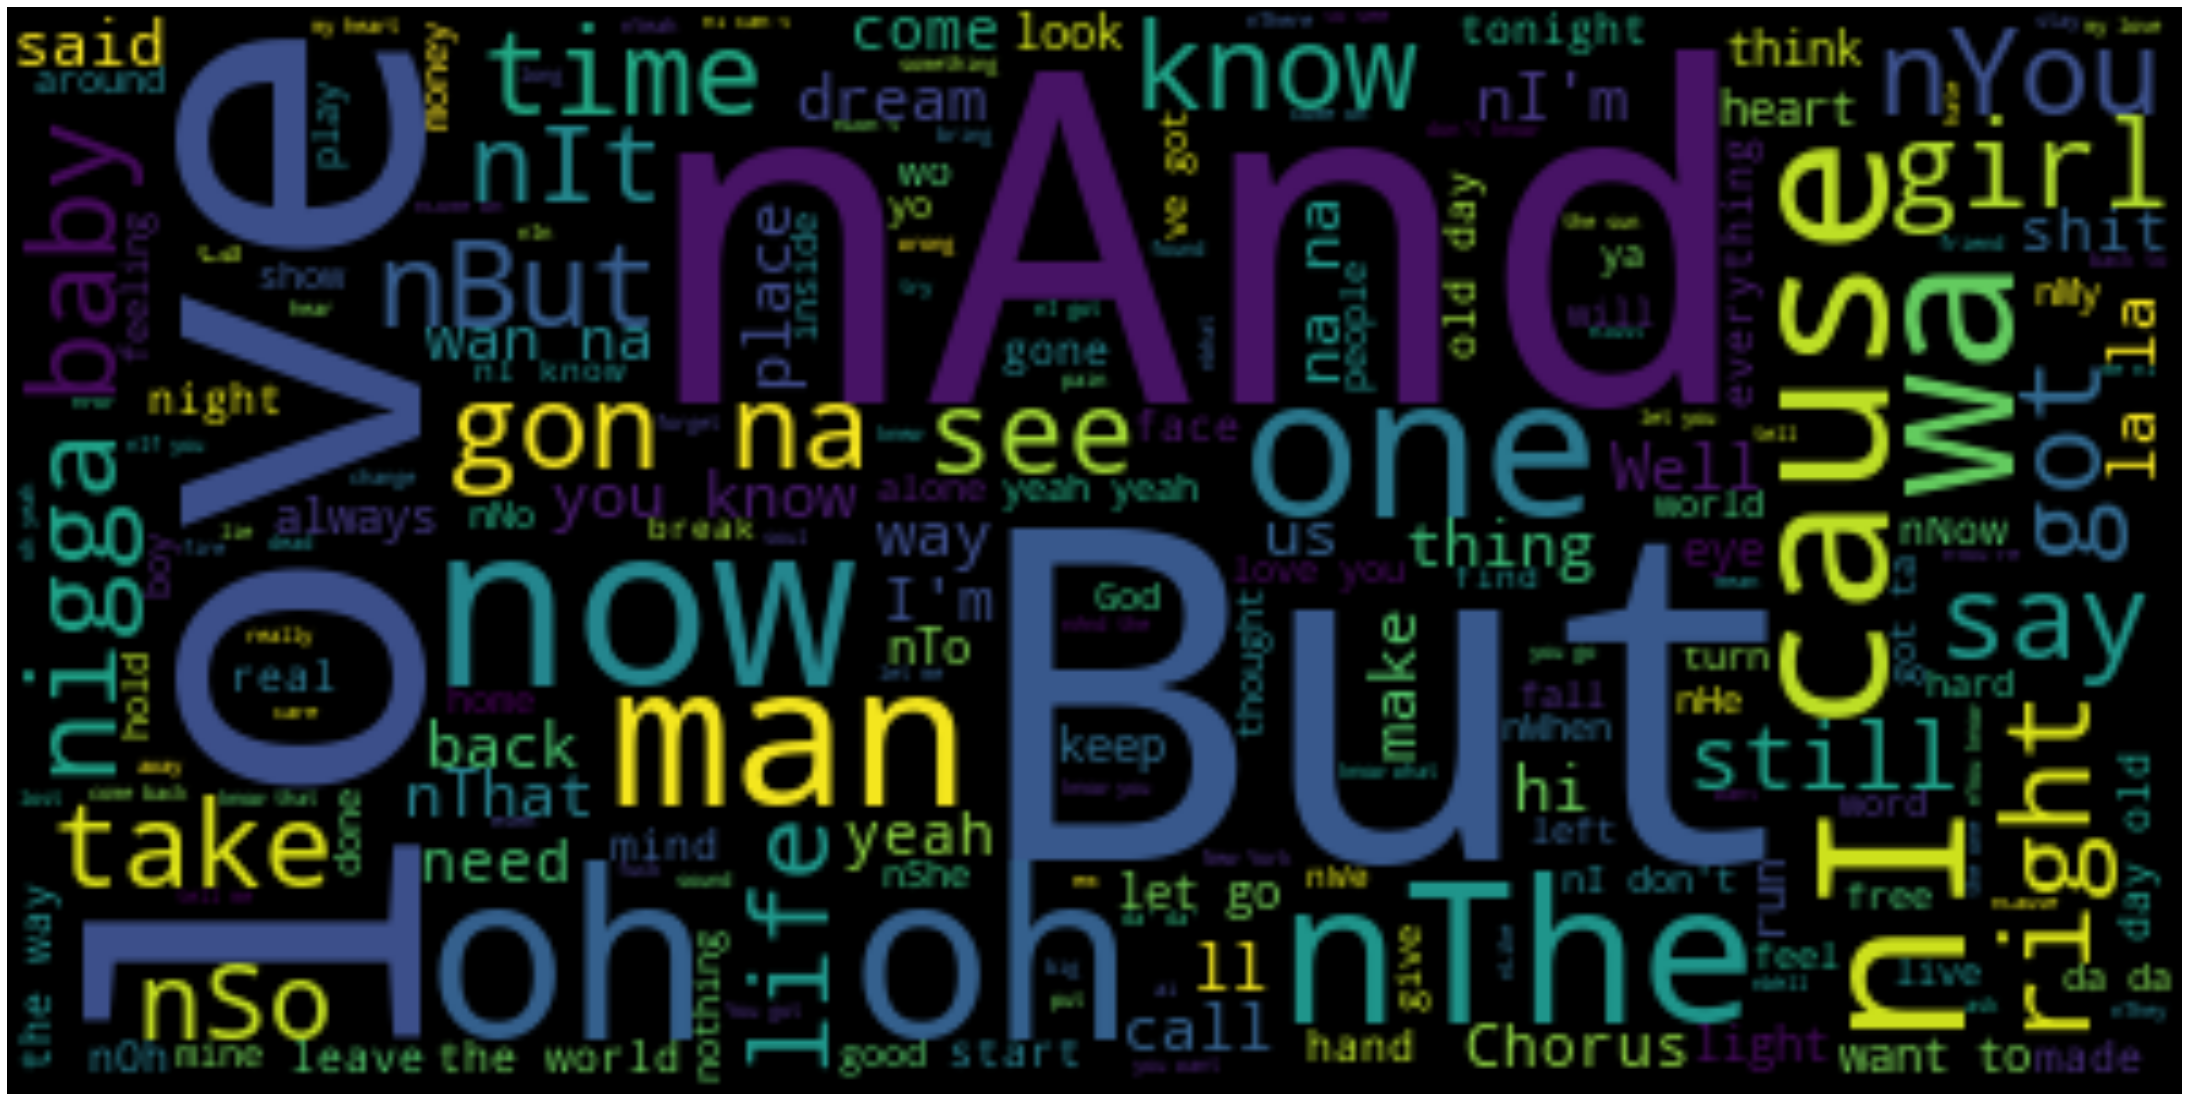

In [270]:
#pip install WordCloud
from wordcloud import WordCloud
# Start with one review:
#text = str(df['lyrics'][10])
text = str(er)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(40,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# Data Cleaning

In [70]:
STOPWORDS = nltk.corpus.stopwords.words('english')

In [261]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
 
df_clean1 = df.copy()
for i in range(len(df['lyrics'])):
    example_sent = df['lyrics'][i]

    stop_words = nltk.corpus.stopwords.words('english')
    meaningless = ["n't","She","'s","'re","I've","I'",'and','Verse']
    stop_words.extend(meaningless)

    word_tokens = word_tokenize(example_sent) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    df_clean1['lyrics'][i] = str(filtered_sentence)

/Users/Fox/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [263]:
er1 = []
for i in range(len(df_clean1['lyrics'])):
    er1.append(df_clean1['lyrics'][i])
er1

['[\'One\', \':\', \'Alright\', \'I\', \'might\', \'Have\', \'little\', \'glare\', \'I\', \'stared\', \'ya\', \'ho\', \'But\', \'I\', \'know\', \'like\', \'stared\', \'right\', \'back\', \'My\', \'niggas\', \'warnin\', \'comin\', \'I\', \'react\', \'like\', \'mack\', \'I\', \'act\', \'cool\', \'Just\', \'test\', \'cause\', \'I\', \'ai\', \'jester\', \'I\', \'suggest\', \'friend\', \'outtie\', \'Cause\', \'I\', \'want\', \'make\', \'pals\', \'get\', \'rowdy\', \'And\', \'doubt\', \'friendship\', \'But\', \'lips\', \'touch\', \'I\', \'go\', \'crazy\', \'clutch\', \'Sorta\', \'like\', \'schitzo\', \'I\', \'forgets\', \'bros\', \'pals\', \'gals\', \'I\', \'mean\', \'fiend\', \'Strange\', \'things\', \'denim\', \'matter\', \'em\', \'Grab\', \'flooze\', \'I\', "\'m", \'traffic\', \'Do\', \'laugh\', \'might\', \'girl\', \'I\', "\'m", \'talkin\', \'I\', \'mean\', \'Chorus\', \':\', \'Repeat\', \'2X\', \'It\', \'ai\', \'fault\', \'girl\', \'got\', \'caught\', \'It\', \'ai\', \'fault\', \'girl\'

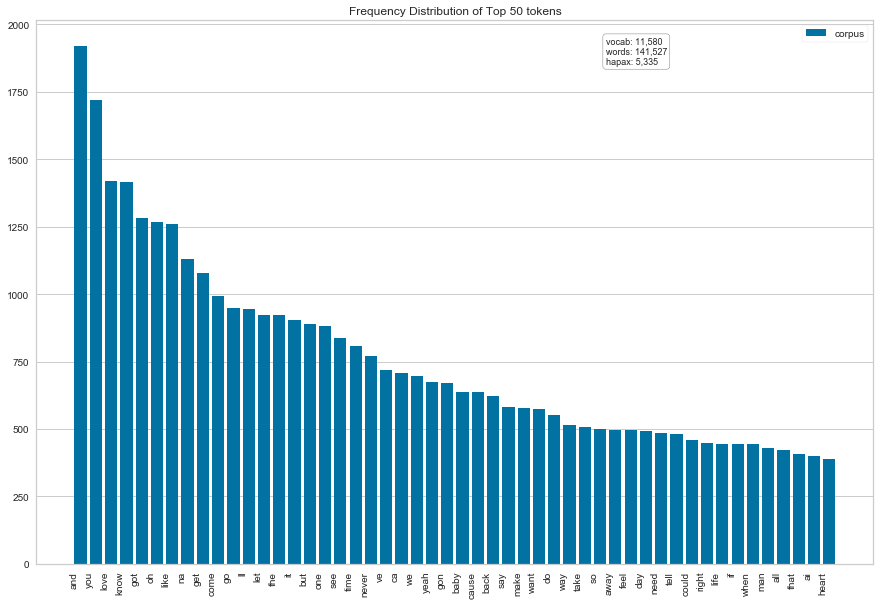

In [264]:
# Load the text data
#Lyrics = df_clean1['lyrics']
Lyrics = er1
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(Lyrics)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v',size=(1080, 720))
visualizer.fit(docs)
visualizer.show()

In [220]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
 
df_clean = df.copy()
for i in range(len(df['lyrics'])):
    example_sent = df['lyrics'][i]

    stop_words = nltk.corpus.stopwords.words('english')
    meaningless = ["n't","She","'s","Verse","ve","One","little",'ve','It']
    stop_words.extend(meaningless)

    word_tokens = word_tokenize(example_sent) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    df_clean['lyrics'][i] = filtered_sentence

/Users/Fox/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
